## OpenCV  - Python Tutorial 2

Course : Visual Recognition   
Instructor: Prof. J Dinesh  
Tuesday, 21 Jan, 2020  

#### Contents
- Regions : K-means for segmentation
- Interest Points

Docs and tutorials : https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Regions

Extracting different regions in an image.

We will use k - means from opencv. check the docs here https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html

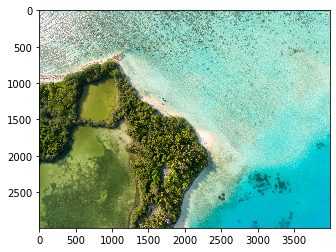

In [2]:
img = cv2.imread("./images/beach.jpeg")
plt.imshow(img[:, :, [2, 1, 0]])

Binary Thresholding - Background / Foreground? - Extracting two regions - How to set the threshold?

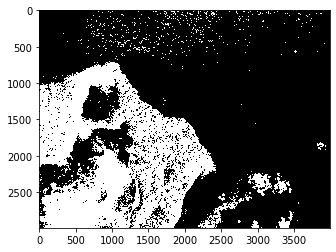

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
ret, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap = "binary")

#### Using K-means

Steps Involved :
- Reshape the image. Here each pixel RGB values will be our feature vectors. (feature vector of size 3)
- We use these to group pixels using k-means from opencv.

In [4]:
# reshape to flatten
vectorized = img.reshape((-1,3))
# NOTE - cv2 k-means expects the image to be of type float32
vectorized = np.float32(vectorized)
print(img.shape, vectorized.shape)


# define criteria
# here EPS - stop if specified epsilon is reached
# MAX_ITER - stop if specified max iterations are reached
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# run kmeans
# 3 clusters
K = 3
# 10 iterations
attempts=10

ret, label, centers = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

(2992, 3992, 3) (11944064, 3)


In [5]:
centers

array([[194.64122 , 184.84511 ,   8.504819],
       [ 46.125916,  99.94844 ,  85.04575 ],
       [188.91866 , 214.84448 , 163.04547 ]], dtype=float32)

In [6]:
# convert back to int
centers = np.uint8(centers)

# get the regions
res = centers[label.flatten()]
result_image = res.reshape((img.shape))

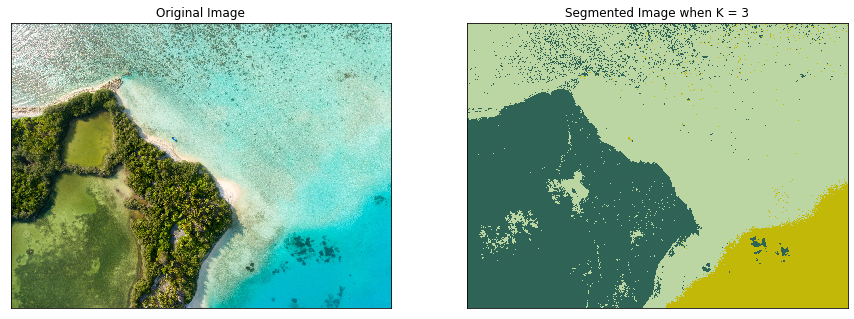

In [7]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img[:, :, [2, 1, 0]])
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

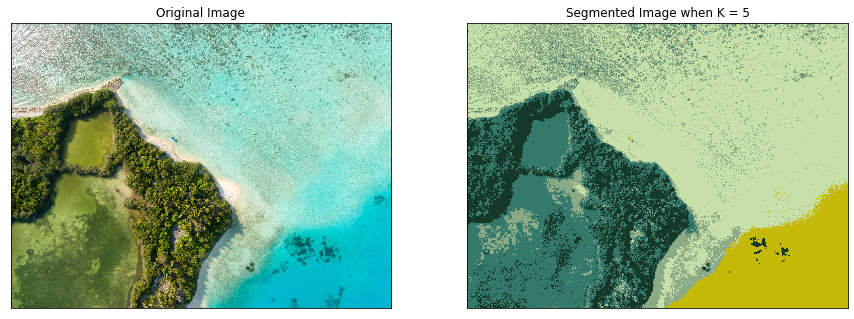

In [8]:
# Trying different number of clusters
K = 5
ret, label, centers = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
centers = np.uint8(centers)
res = centers[label.flatten()]
result_image = res.reshape((img.shape))

plt.figure(figsize=(15, 15))
plt.subplot(1,2,1),plt.imshow(img[:, :, [2, 1, 0]])
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

## Interest Points 

- Harris Corners
- SIFT, SURF, ORB
- Matching and Homography


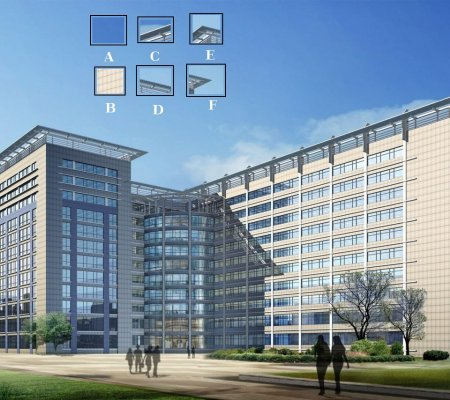
Photo from opencv python tutorials

### Harris Corners

Chris Harris & Mike Stephens, A Combined Corner and Edge Detector, 1988

- __img__ : Input image, it should be grayscale and float32 type.
- __blockSize__ : It is the size of neighbourhood considered for corner detection
- __ksize__ : Aperture parameter of Sobel derivative used.
- __k__ : Harris detector free parameter in the equation.

source : https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html

In [ ]:
img = cv2.imread("./images/board.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
copy = img.copy()


dst = cv2.cornerHarris(gray, 2, 3, 0.04)


dst = cv2.dilate(dst,None)
copy[dst > 0.01 * dst.max()] = [0, 255, 0]
plt.figure(figsize = (15, 15))
plt.imshow(copy[:, :, [2, 1, 0]])

Required properties :

- Translation Invariance
- Rotation Invariance
- Scale Invariance


__SIFT__ : https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html#sift-intro

__SURF__ : https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_surf_intro/py_surf_intro.html#surf

__ORB__ : https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_orb/py_orb.html#orb

__FAST__ : https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_fast/py_fast.html#fast
____

In [ ]:
img = cv2.imread("./images/notre.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
# For opencv versions 2.4.x
# sift = cv2.SIFT_create()

# For opencv versions >= 3.0
# You must also have opencv-contrib installed
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(gray,None)

copy = cv2.drawKeypoints(img, kp, outImage = None)
plt.figure(figsize = (15, 15))
plt.imshow(copy[:, :, [2, 1, 0]])

In [ ]:
print(len(kp), des.shape)

### Matching Features

In [ ]:
img1 = cv2.imread('images/book.jpeg')          
img2 = cv2.imread('images/book_in_scene.jpeg') 

fig, axs = plt.subplots(1, 2, figsize = (15, 15))

axs[0].imshow(img1[:, :, [2, 1, 0]])
axs[1].imshow(img2[:, :, [2, 1, 0]])

In [ ]:
# Initiate SIFT detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

Here we have used Brute force matcher opencv provides FLANN (Fast Library for Approximate Nearest Neighbors). It contains a collection of algorithms optimized for fast nearest neighbor search in large datasets and for high dimensional features.

Read about it here : https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html#matcher

In [ ]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1, des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x : x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:20], None, flags=2)

plt.figure(figsize = (15, 15))
plt.imshow(img3[:, :, [2, 1, 0]])

Find Homography and use perspective transform function to map points in the first image to the second image.


A read on homography : https://docs.opencv.org/master/d9/dab/tutorial_homography.html

In [ ]:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
    # compute Homography
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    # Draw a rectangle that marks the found model in the frame
    h, w, c = img1.shape
    pts = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2)
    
    # project corners into frame
    dst = cv2.perspectiveTransform(pts, M)
    copy = img2.copy()
    cv2.drawContours(copy, [dst.astype(np.int32)], -1, (0, 255, 0), 7)
    plt.figure(figsize = (10, 10))
    plt.imshow(copy[:, :, [2, 1, 0]])

In [ ]:
dst

In [ ]:
# Hard coded the 3 corner points 
pts1 =  np.float32([[431, 248], [769, 118], [1022, 656]]) 

img3 = cv2.resize(cv2.imread("images/Origin.jpg"), (img2.shape[1], img2.shape[0]))
h, w, c = img3.shape
# Hard coded the same points on the reference image to be fitted.
pts2 =  np.float32([[0, 0], [w, 0], [w, h]]).reshape(-1, 1, 2) 

# Getting affine transformation form sample image to template.
M = cv2.getAffineTransform(pts2, pts1)

# Applying the transformation, mind the (cols,rows) passed, these define the final dimensions of output after Transformation.
aff_img3 = cv2.warpAffine(img3, M, (w, h))

cv2.fillPoly(img2, pts = [dst.astype('int32')], color=(0, 0, 0))
final = img2 + aff_img3
plt.figure(figsize = (10, 10))
plt.imshow(final[:, :, [2, 1, 0]])
# plt.imshow(dst[:, :, [2, 1, 0]])
